<a href="https://colab.research.google.com/github/malekslokom/Bayesian-Network/blob/main/Restaurants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Book*: **Mastering Probabilistic
Graphical Models Using Python**



*Case*: Consider a set of restaurants. Let X be a random variable representing
the quality of food in a restaurant. It can take up a set of values, such as {good, bad,
average}. P(X), represents the probability distribution of X, that is, if P(X = good) = 0.3,
P(X = average) = 0.5, and P(X = bad) = 0.2. This means there is 30 percent chance of a
restaurant serving good food, 50 percent chance of it serving average food, and 20
percent chance of it serving bad food.

To choose a restaurant, we won't only be
looking just at the quality of food; we might also want to look at other attributes,
such as the cost, location, size, and so on.

The cost of food in a restaurant is not only affected by the quality of food
but also the location (generally, a restaurant located in a very good location would
be more costly as compared to a restaurant present in a not-very-good location).

*   Q: quality of food {good, average, bad},
*   C: the cost of food {high, low},
*   L: location {good, bad},
*   N: number of people visiting the restaurant







# Libraries

In [1]:
!pip install pgmpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 9.6 MB/s 


In [2]:
#Model
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.models import BayesianModel
from pgmpy.independencies import IndependenceAssertion
#Inferences
from pgmpy.inference import VariableElimination

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Bayesian models

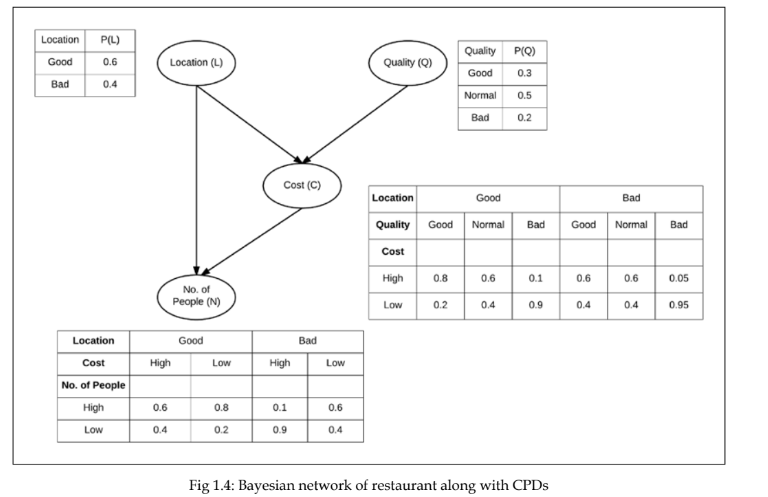



the joint probability distribution: P(Q,C,L,N) = P(Q)P(L)P(C|Q, L)P(N|C, L)

## Structure

In [20]:
model=BayesianModel([('Quality','Cost'),('Location','Cost'),('Location','no_of_people'),('Cost','no_of_people')])

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


## Representing CPDs

In [21]:
quality = TabularCPD(variable='Quality',
variable_card=3,
values=[[0.3], [0.5], [0.2]])
print(quality)

+------------+-----+
| Quality(0) | 0.3 |
+------------+-----+
| Quality(1) | 0.5 |
+------------+-----+
| Quality(2) | 0.2 |
+------------+-----+


In [22]:
quality.cardinality

array([3])

In [23]:
quality.values

array([0.3, 0.5, 0.2])

In [24]:
location = TabularCPD(variable='Location',
variable_card=2,
values=[[0.6], [0.4]])
print(location)

+-------------+-----+
| Location(0) | 0.6 |
+-------------+-----+
| Location(1) | 0.4 |
+-------------+-----+


In [25]:
cost = TabularCPD(
variable='Cost',
variable_card=2,
values=[[0.8, 0.6, 0.1, 0.6, 0.6, 0.05],
[0.2, 0.4, 0.9, 0.4, 0.4, 0.95]],
evidence=['Quality', 'Location'],
evidence_card=[3, 2])
print(cost)

+----------+-------------+-----+-------------+-------------+
| Quality  | Quality(0)  | ... | Quality(2)  | Quality(2)  |
+----------+-------------+-----+-------------+-------------+
| Location | Location(0) | ... | Location(0) | Location(1) |
+----------+-------------+-----+-------------+-------------+
| Cost(0)  | 0.8         | ... | 0.6         | 0.05        |
+----------+-------------+-----+-------------+-------------+
| Cost(1)  | 0.2         | ... | 0.4         | 0.95        |
+----------+-------------+-----+-------------+-------------+


In [26]:
No_people = TabularCPD(
variable='no_of_people',
variable_card=2,
values=[[0.6, 0.8, 0.1, 0.6],
[0.4, 0.2, 0.9, 0.4]],
evidence=['Cost', 'Location'],
evidence_card=[2, 2])
print(No_people)

+-----------------+-------------+-------------+-------------+-------------+
| Cost            | Cost(0)     | Cost(0)     | Cost(1)     | Cost(1)     |
+-----------------+-------------+-------------+-------------+-------------+
| Location        | Location(0) | Location(1) | Location(0) | Location(1) |
+-----------------+-------------+-------------+-------------+-------------+
| no_of_people(0) | 0.6         | 0.8         | 0.1         | 0.6         |
+-----------------+-------------+-------------+-------------+-------------+
| no_of_people(1) | 0.4         | 0.2         | 0.9         | 0.4         |
+-----------------+-------------+-------------+-------------+-------------+


In [27]:
model.add_cpds(quality,location,cost,No_people)

# Inference

In [28]:
# Creating the inference object of the model
restaurant_inference = VariableElimination(model)

In [33]:
# Doing simple queries over one or multiple variables.
prob_location=restaurant_inference.query(variables=['Location'])
print(prob_location)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-------------+-----------------+
| Location    |   phi(Location) |
+=============+=================+
| Location(0) |          0.6000 |
+-------------+-----------------+
| Location(1) |          0.4000 |
+-------------+-----------------+


In [34]:
proba_location_no=restaurant_inference.query(
variables=['Location', 'no_of_people'])
print(proba_location_no)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+-------------+-----------------+------------------------------+
| Location    | no_of_people    |   phi(Location,no_of_people) |
+=============+=================+==============================+
| Location(0) | no_of_people(0) |                       0.1830 |
+-------------+-----------------+------------------------------+
| Location(0) | no_of_people(1) |                       0.4170 |
+-------------+-----------------+------------------------------+
| Location(1) | no_of_people(0) |                       0.2792 |
+-------------+-----------------+------------------------------+
| Location(1) | no_of_people(1) |                       0.1208 |
+-------------+-----------------+------------------------------+


In [37]:
# We can also specify the order in which the variables are to be
# eliminated. If not specified pgmpy automatically computes the
# best possible elimination order.
proba_no=restaurant_inference.query(variables=['no_of_people'],elimination_order=['Location', 'Cost', 'Quality'])
print(proba_no)

  0%|          | 0/3 [00:00<?, ?it/s]

+-----------------+---------------------+
| no_of_people    |   phi(no_of_people) |
+=================+=====================+
| no_of_people(0) |              0.4622 |
+-----------------+---------------------+
| no_of_people(1) |              0.5378 |
+-----------------+---------------------+


In [43]:
# If we have some evidence for the network we can simply pass it
# as an argument to the query method in the form of
# {variable: state}
proba_no_location=restaurant_inference.query(variables=['no_of_people'],
evidence={'Location': 1})
print(proba_no_location)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+-----------------+---------------------+
| no_of_people    |   phi(no_of_people) |
+=================+=====================+
| no_of_people(0) |              0.6980 |
+-----------------+---------------------+
| no_of_people(1) |              0.3020 |
+-----------------+---------------------+


In [44]:
proba_no_location_quality=restaurant_inference.query(
variables=['no_of_people'],
evidence={'Location': 1, 'Quality': 1})
print(proba_no_location_quality)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+-----------------+---------------------+
| no_of_people    |   phi(no_of_people) |
+=================+=====================+
| no_of_people(0) |              0.7200 |
+-----------------+---------------------+
| no_of_people(1) |              0.2800 |
+-----------------+---------------------+
